## Cancer Rates Among Virginia Health Districts and Associations with Population and Elevation

### 1.)  Import Libraries

In [3]:
import pandas as pd
import seaborn as sns

### 2.) Read in File

In [4]:
file = pd.read_csv(r'data/Cancer-Incidence-by-Health-District-2011-2020-1.csv', encoding = 'utf-8')
print("File has been read!")

File has been read!


### 3.)  Print columns for clarity of dataframe contents.

In [5]:
file.columns

Index(['DX Year', 'Health District', 'Sex', 'Race', 'All Sites', 'All Sites.1',
       'Breast', 'Breast.1', 'Cervix Uteri', 'Cervix Uteri.1', 'Ovary',
       'Ovary.1', 'Prostate', 'Prostate.1', 'Brain and Other Nervous System',
       'Brain and Other Nervous System.1', 'Hodgkin Lymphoma',
       'Hodgkin Lymphoma.1', 'Non-Hodgkin Lymphoma', 'Non-Hodgkin Lymphoma.1',
       'Kidney and Renal Pelvis', 'Kidney and Renal Pelvis.1',
       'Liver and Intrahepatic Bile Duct',
       'Liver and Intrahepatic Bile Duct.1', 'Leukemia', 'Leukemia.1',
       'Melanoma of the Skin', 'Melanoma of the Skin.1', 'Myeloma',
       'Myeloma.1', 'Oral Cavity and Pharynx', 'Oral Cavity and Pharynx.1',
       'Colorectal', 'Colorectal.1', 'Pancreas', 'Pancreas.1',
       'Lung and Bronchus', 'Lung and Bronchus.1', 'Thyroid', 'Thyroid.1'],
      dtype='object')

### 4.)  Clean data for relevance and narrowing of scope.

In [6]:
new_file = file[['DX Year', 'Sex', 'Race', 'Health District', 'All Sites', 'Melanoma of the Skin', 'Oral Cavity and Pharynx', 'Lung and Bronchus']]

new_file = new_file[3466:3781]

print(new_file.tail())

        DX Year     Sex   Race       Health District All Sites  \
3776  2011-2020  Female  White  Western Tidewater HD     413.4   
3777  2011-2020  Female    All  Western Tidewater HD     407.1   
3778  2011-2020     All  Black  Western Tidewater HD     451.7   
3779  2011-2020     All  White  Western Tidewater HD     451.6   
3780  2011-2020     All    All  Western Tidewater HD     453.9   

     Melanoma of the Skin Oral Cavity and Pharynx Lung and Bronchus  
3776                 35.5                       6                48  
3777                 22.1                     5.7              45.5  
3778                    ^                     7.8                55  
3779                 46.7                    11.5              57.5  
3780                 30.6                    10.5              56.1  


### 5.)  Clean data of null or invalid characters.

In [7]:
#filter out '^' and '*'
new_ff = new_file[new_file['All Sites'].str.contains("\^") == False]
new_file[new_file['Melanoma of the Skin'].str.contains("\^") == False]
new_file[new_file['Oral Cavity and Pharynx'].str.contains("\^") == False]
new_file[new_file['Lung and Bronchus'].str.contains("\^") == False]
#filter in all sexes and all race rows only
new_ff = new_ff[new_ff['Sex'].str.contains("All") == True]

new_ff = new_ff[new_ff['Race'].str.contains("All") == True]

print(new_ff.head())   

        DX Year  Sex Race        Health District All Sites  \
3474  2011-2020  All  All          Alexandria HD     329.4   
3483  2011-2020  All  All           Alleghany HD     457.9   
3492  2011-2020  All  All           Arlington HD     348.8   
3501  2011-2020  All  All  Central Shenandoah HD     456.3   
3510  2011-2020  All  All    Central Virginia HD     428.5   

     Melanoma of the Skin Oral Cavity and Pharynx Lung and Bronchus  
3474                 11.9                     7.4                31  
3483                 32.6                    13.1              60.5  
3492                 13.1                     8.8              32.8  
3501                 31.1                    12.6              58.2  
3510                 21.3                      10              61.6  


In [8]:
pop = pd.read_csv('data/Population and Elevation by Health District.csv')
print('population file has been read!')

population file has been read!


### 6.)  Cast as appropriate datatypes

In [9]:
import matplotlib.pyplot as plt
import numpy as np

#code for alternate analysis:
#print(new_ff['Non-Hodgkin Lymphoma'])
#print(new_ff['Non-Hodgkin Lymphoma.1'])
#new_df = new_ff[['Health District', 'Non-Hodgkin Lymphoma']]
#new_df= new_df.iloc[1:, :]

new_ff['All Sites'] = new_ff['All Sites'].astype(float)
new_ff['Melanoma of the Skin'] = new_ff['Melanoma of the Skin'].astype(float)
new_ff['Oral Cavity and Pharynx'] = new_ff['Oral Cavity and Pharynx'].astype(float)


#do the same for Lymphoma counts data:
#new_df2 = new_ff[['Health District', 'Non-Hodgkin Lymphoma.1']]
#new_df2 = new_df2.iloc[1:, :]
#new_df2['Non-Hodgkin Lymphoma.1'] = new_df2['Non-Hodgkin Lymphoma.1'].astype(float)
#group2 = new_df2.groupby('Health District').mean().reset_index()

print(new_ff.head())
#print(group2)
print(pop.head())

        DX Year  Sex Race        Health District  All Sites  \
3474  2011-2020  All  All          Alexandria HD      329.4   
3483  2011-2020  All  All           Alleghany HD      457.9   
3492  2011-2020  All  All           Arlington HD      348.8   
3501  2011-2020  All  All  Central Shenandoah HD      456.3   
3510  2011-2020  All  All    Central Virginia HD      428.5   

      Melanoma of the Skin  Oral Cavity and Pharynx Lung and Bronchus  
3474                  11.9                      7.4                31  
3483                  32.6                     13.1              60.5  
3492                  13.1                      8.8              32.8  
3501                  31.1                     12.6              58.2  
3510                  21.3                     10.0              61.6  
      Health District  Population at 2015  Elevation Estimate (feet)
0           Alleghany            179014.0                     1732.0
1             Fairfax           1168405.0          

### 7.)  Visualize Overall Cancer Rates per Health District and Provide Population Chart for Context.

        DX Year  Sex Race        Health District  All Sites  \
3600  2011-2020  All  All           Lenowisco HD      307.2   
3555  2011-2020  All  All  Cumberland Plateau HD      320.0   
3474  2011-2020  All  All          Alexandria HD      329.4   
3573  2011-2020  All  All             Fairfax HD      348.4   
3492  2011-2020  All  All           Arlington HD      348.8   

      Melanoma of the Skin  Oral Cavity and Pharynx Lung and Bronchus  
3600                   7.1                     11.0              65.9  
3555                  12.5                      9.2              58.1  
3474                  11.9                      7.4                31  
3573                  12.3                      8.4              31.3  
3492                  13.1                      8.8              32.8  


C:\Users\Cross Family\AppData\Local\Temp\ipykernel_10616\1035405231.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(x,rotation=45,ha="right",rotation_mode='anchor', fontsize = 14)
C:\Users\Cross Family\AppData\Local\Temp\ipykernel_10616\1035405231.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(b, fontsize = 14)


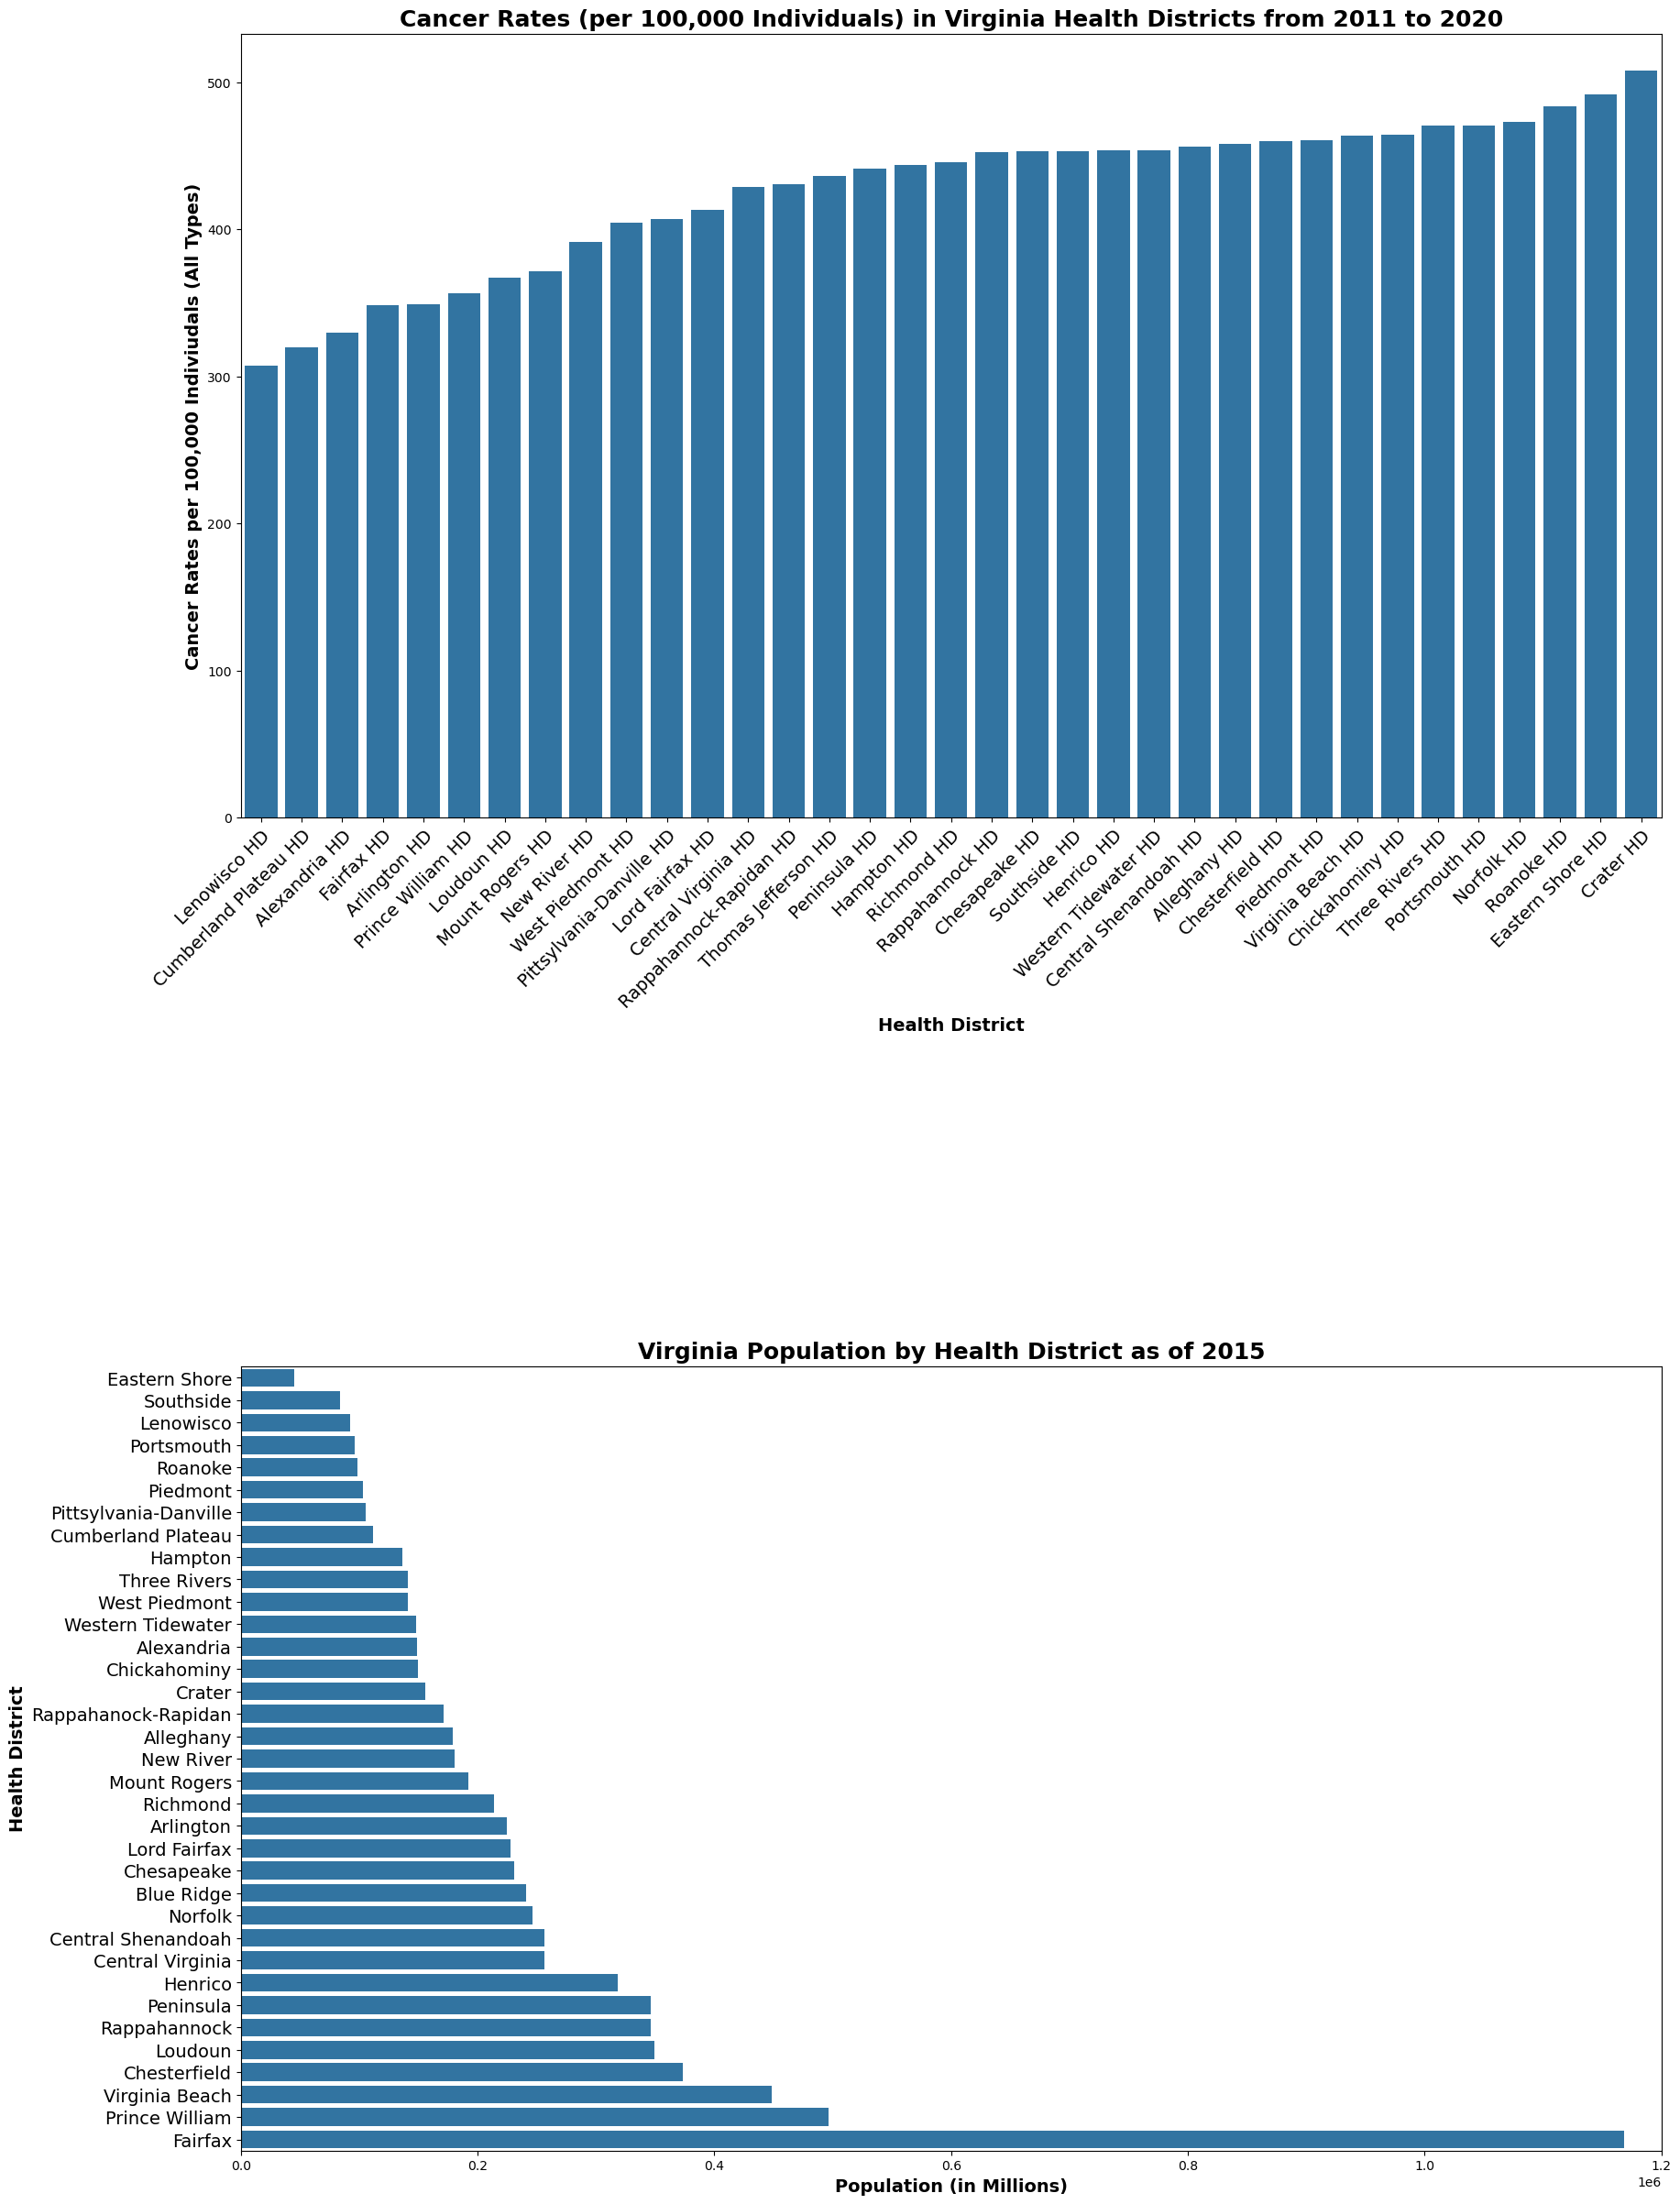

In [10]:


new_ff = new_ff.sort_values(('All Sites'), ascending = True)


#new_df2 = group2.sort_values('Non-Hodgkin Lymphoma.1')
#new_df = group.sort_values('Non-Hodgkin Lymphoma')

pop_df = pop.sort_values(('Population at 2015'), ascending = True) 
print(new_ff.head())
#print(new_df.head())
#print(new_df2.head())
#print(new_df3.head())
#print(new_df.shape)
#print(new_df2.shape)
#print(new_df3.shape)

y = new_ff['All Sites']
#x2 = new_df2['Health District']
x = new_ff['Health District']
#y2 = new_df2['Non-Hodgkin Lymphoma.1']
z = new_ff['Melanoma of the Skin']



fig, ax = plt.subplots(figsize=(20, 30), nrows = 2) 

sns.barplot(new_ff, x = x, y = y, ax = ax[0])

a = pop_df['Population at 2015']
b = pop_df['Health District']

#sns.barplot(new_df, x = y, y = x, orient = 'h', ax = ax[0])
#sns.barplot(new_df2, x = y2, y = x2, orient = 'h', ax = ax[1])
sns.barplot(pop_df, x = a, y = b, orient = 'h', ax = ax[1])
plt.subplots_adjust(hspace = 0.7)


ax[0].set_title('Cancer Rates (per 100,000 Individuals) in Virginia Health Districts from 2011 to 2020', weight = 'bold', fontsize = 18)
ax[0].set_xlabel('Health District', weight = 'bold', fontsize = 14)
ax[0].set_ylabel('Cancer Rates per 100,000 Indiviudals (All Types)', weight = 'bold', fontsize = 14)
ax[0].set_xticklabels(x,rotation=45,ha="right",rotation_mode='anchor', fontsize = 14)



#ax[1].set_title('Non-Hodgkin Lymphoma Incidents in Virginia Health Districts')
#ax[1].set_ylabel('Health District')
#ax[1].set_xlabel('Non-Hodgkins Lymphoma Count')

ax[1].set_title('Virginia Population by Health District as of 2015', weight = 'bold', fontsize = 18)
ax[1].set_ylabel('Health District', weight = 'bold', fontsize = 14)
ax[1].set_xlabel('Population (in Millions)', weight = 'bold', fontsize = 14)
ax[1].set(xlim = (0, 1200000))
ax[1].set_yticklabels(b, fontsize = 14)



plt.show()


### 8.)  Create new dataframe with fewer variables for more specific analysis.

In [11]:
df_corr = pd.concat([new_ff['Health District'].reset_index(drop=True), new_ff['All Sites'].reset_index(drop=True), pop_df['Elevation Estimate (feet)'].reset_index(drop=True), new_ff['Melanoma of the Skin'].reset_index(drop=True), new_ff['Lung and Bronchus'].reset_index(drop=True), new_ff['Oral Cavity and Pharynx'].reset_index(drop=True), pop_df['Population at 2015'].reset_index(drop=True)], axis=1)
print(df_corr.head())


         Health District  All Sites  Elevation Estimate (feet)  \
0           Lenowisco HD      307.2                        5.0   
1  Cumberland Plateau HD      320.0                      380.0   
2          Alexandria HD      329.4                     1932.0   
3             Fairfax HD      348.4                       20.0   
4           Arlington HD      348.8                      974.0   

   Melanoma of the Skin Lung and Bronchus  Oral Cavity and Pharynx  \
0                   7.1              65.9                     11.0   
1                  12.5              58.1                      9.2   
2                  11.9                31                      7.4   
3                  12.3              31.3                      8.4   
4                  13.1              32.8                      8.8   

   Population at 2015  
0             45273.0  
1             83800.0  
2             92431.0  
3             96205.0  
4             98465.0  


## Investigate Correlation between Population and Oral/Throat Cancer

In [12]:
#new dataframe
df_lm = df_corr[['Population at 2015', 'Oral Cavity and Pharynx']]

### 9.)  Create scatterplot and run Pearson R to find any relevant correlations

PearsonRResult(statistic=0.6259500147181453, pvalue=5.779485291837967e-05)

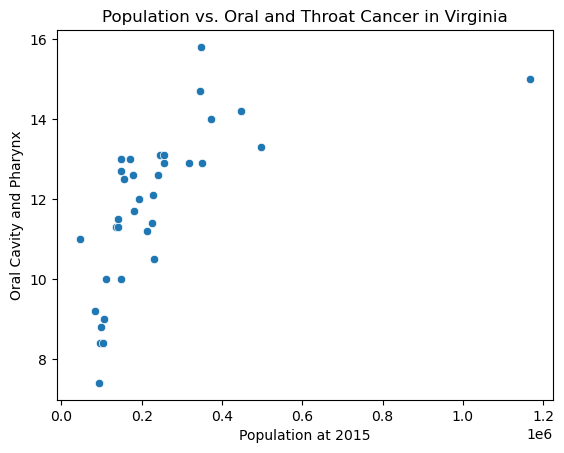

In [13]:
scatter_corr = sns.scatterplot(data = df_lm, x = df_lm['Population at 2015'], y = df_lm['Oral Cavity and Pharynx'])
scatter_corr.set_title("Population vs. Oral and Throat Cancer in Virginia")
from scipy import stats
stats.pearsonr(df_lm['Population at 2015'], df_lm['Oral Cavity and Pharynx'])

## Finding:  There is a moderate positive correlation (R=0.63) between population and oral/throat cancer in Virginia.

### 10.) Vizualize the correlation with a curved line graph

In [14]:
# get x and y vectors
x = df_lm['Population at 2015']
y = df_lm['Oral Cavity and Pharynx']
# calculate polynomial
z = np.polyfit(x, y, 2)
f = np.poly1d(z)
print(f)

            2
-1.262e-11 x + 2.04e-05 x + 8.181


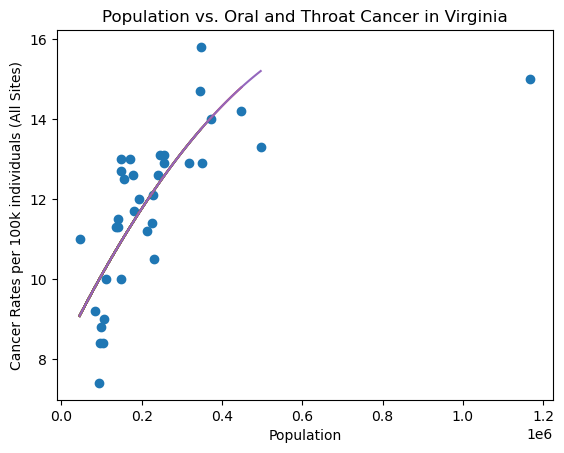

In [15]:
# calculate new x's and y's; exclude the outlier
x_new = np.linspace(x[0], x[:-1])
y_new = f(x_new)
plt.title("Population vs. Oral and Throat Cancer in Virginia")
plt.xlabel("Population")
plt.ylabel("Cancer Rates per 100k individuals (All Sites)")
plt.plot(x,y,'o', x_new, y_new)
plt.show()


# Exploring Elevation as a Factor

### 11.) Create a scatterplot to vizualize any possible relationship

PearsonRResult(statistic=-0.07615987266813207, pvalue=0.6636807533986998)

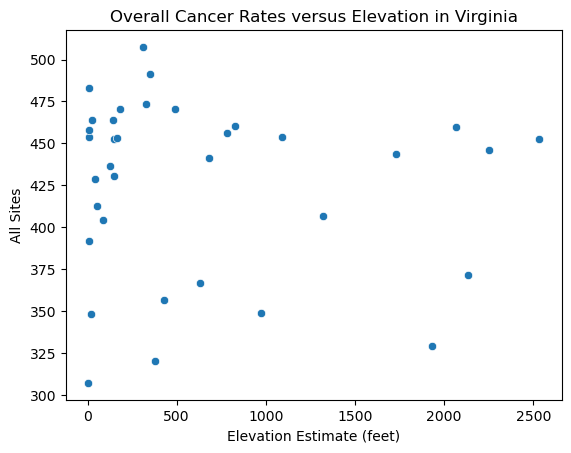

In [16]:
ele_pop=sns.scatterplot(x = df_corr["Elevation Estimate (feet)"], y = df_corr["All Sites"])
ele_pop.set_title("Overall Cancer Rates versus Elevation in Virginia")
from scipy import stats
stats.pearsonr(df_corr["All Sites"], df_corr["Elevation Estimate (feet)"])

 # Overall Cancer Rates vs. Elevation

### 12.) Plot a regression line for clarity of any correlation

PearsonRResult(statistic=-0.07615987266813207, pvalue=0.6636807533986998)

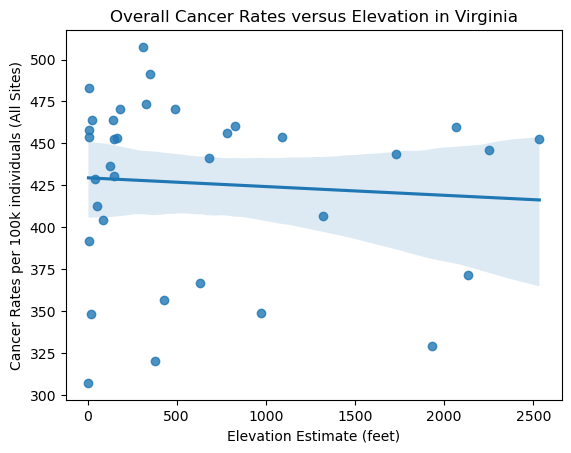

In [17]:
reg_elepop = sns.regplot(data = df_corr, x = df_corr["Elevation Estimate (feet)"], y = df_corr["All Sites"])
reg_elepop.set_title("Overall Cancer Rates versus Elevation in Virginia")
reg_elepop.set_ylabel("Cancer Rates per 100k individuals (All Sites)")
stats.pearsonr(df_corr["All Sites"], df_corr["Elevation Estimate (feet)"])

###  There seems to be no significant correlation between elevation and general cancer rates in Virginia.

# Lung Cancer vs. Elevation

### 13.)  Plot a regression line for visualization of any correlation

In [18]:
df_corr['Lung and Bronchus'] = df_corr['Lung and Bronchus'].astype(float)

PearsonRResult(statistic=-0.08311989275160706, pvalue=0.6349951070893783)

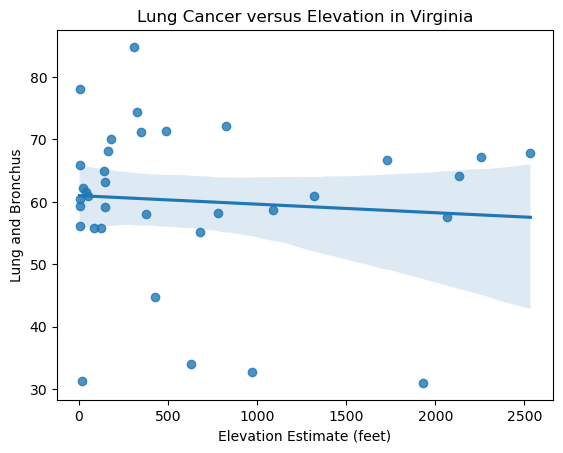

In [19]:
lung_reg = sns.regplot(data=df_corr, x=df_corr['Elevation Estimate (feet)'], y=df_corr['Lung and Bronchus'], )
lung_reg.set_title("Lung Cancer versus Elevation in Virginia")
stats.pearsonr(df_corr["Lung and Bronchus"], df_corr['Elevation Estimate (feet)'])


###  Suprisingly, only a very weak, negligible negative correlation between lung cancer rates and elevation was found here.  This contrasts with other current research.

# Oral Cancer vs. Elevation

### 14.)  Plot a regression line

PearsonRResult(statistic=-0.186879902458863, pvalue=0.28239735085605266)

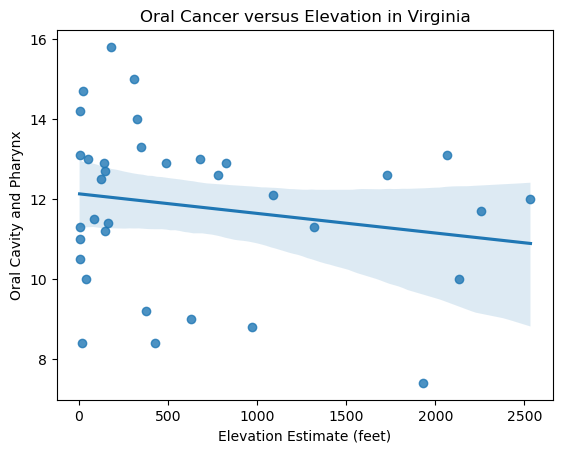

In [20]:
oral_ele = sns.regplot(data=df_corr, x=df_corr['Elevation Estimate (feet)'], y=df_corr['Oral Cavity and Pharynx'])
oral_ele.set_title("Oral Cancer versus Elevation in Virginia")
stats.pearsonr(df_corr["Oral Cavity and Pharynx"], df_corr['Elevation Estimate (feet)'])

## Lung and Bronchus Cancer vs. Population

### 15.) Plot a regression line to visualize any correlation

PearsonRResult(statistic=0.6103047755848794, pvalue=9.904968092507684e-05)

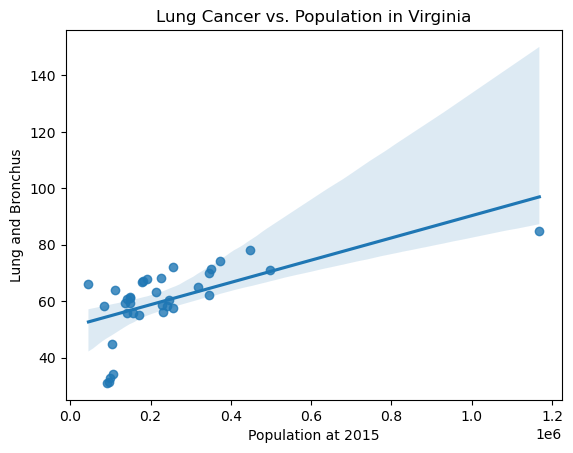

In [21]:
pop_lb = df_corr[['Population at 2015', 'Lung and Bronchus']]
x = pop_lb['Population at 2015']
y = pop_lb['Lung and Bronchus']
lung_pop = sns.regplot(data=pop_lb, x=x, y=y)
lung_pop.set_title('Lung Cancer vs. Population in Virginia')
stats.pearsonr(x, y)

### The strong correlation between population and Oral/Pharynx Cancer found earlier (above), suggested a similar association between population and lung cancer would be probable.  Indeed, a positive correlation of moderate strength is observed between lung cancer and health district population.

### Further analyses with these data are possible by correlating them across other public and available datasets.  Some research, for instance, is available comparing water quality to cancer rates; however, further study of how the presence of specific toxins and particulates are correlated with cancer rates would be beneficial.  

#####  Data related to cancer rates were found publicly available via Virginia Department of Health's website.  Elevation data was gathered via us.topographic-map.com via TessaDEM's Elevation API.  Population numbers were gathered from publicly available census data.   